In [4]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns

In [5]:
x,y = make_moons(100,noise=0.25, random_state=2)

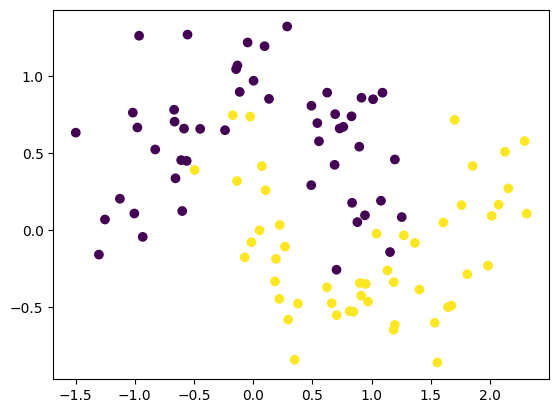

In [7]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [11]:
model = Sequential()
model.add(Dense(128,activation='relu',input_dim = 2))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy',optimizer=adam , metrics=['accuracy'])
history=model.fit(x,y,epochs=500,validation_split=0.2)

Epoch 1/500


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.6062 - loss: 0.6588 - val_accuracy: 0.9000 - val_loss: 0.4106
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8281 - loss: 0.4446 - val_accuracy: 0.9000 - val_loss: 0.2533
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8547 - loss: 0.3737 - val_accuracy: 0.9000 - val_loss: 0.2014
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8547 - loss: 0.3585 - val_accuracy: 0.9000 - val_loss: 0.2440
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8406 - loss: 0.3407 - val_accuracy: 0.9000 - val_loss: 0.2259
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8609 - loss: 0.3263 - val_accuracy: 0.9000 - val_loss: 0.2007
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8328 - loss: 0.3327 - val_accuracy: 0.9000 - val_loss: 0.2132
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8547 - loss: 0.3151 - val_accuracy: 0.9000 - val_loss: 0.1945
Epo

plot shows overfitting

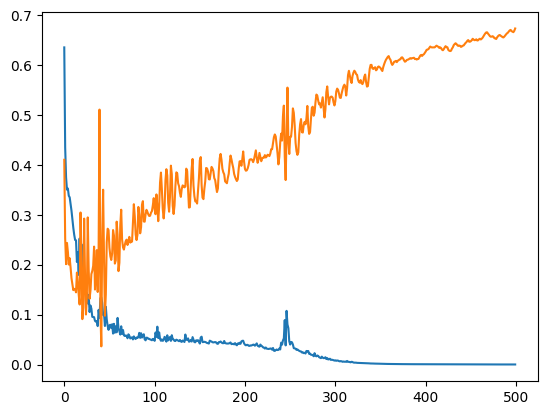

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [19]:
model_regularization = Sequential()
model_regularization.add(Dense(128, input_dim=2, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.L2(0.001)))
model_regularization.add(Dense(128,activation='relu', kernel_regularizer = tensorflow.keras.regularizers.L2(0.001)))
model_regularization.add(Dense(1,activation='sigmoid'))

adam=Adam(learning_rate=0.01)
model_regularization.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
history_regularization = model_regularization.fit(x,y,epochs=500,verbose=0, validation_split=0.2)


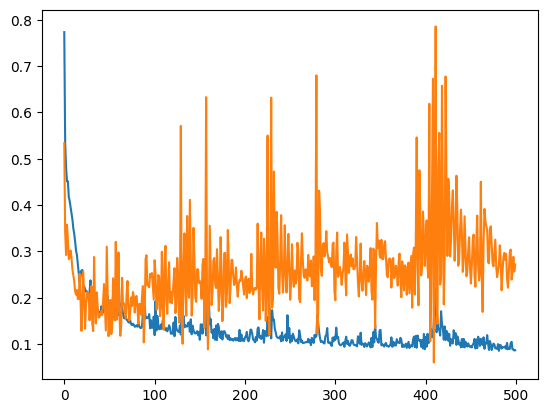

In [21]:
plt.plot(history_regularization.history['loss'])
plt.plot(history_regularization.history['val_loss'])